# Yearly variation

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib import cm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import scipy 

In [268]:
def plot_y(df,unit,param,color='red'):
    
    fig=plt.figure(figsize=[30,18])  
    plt.plot(df['year'], df[param],color,marker='o')
    plt.xlabel('Years',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
    plt.xticks(fontsize=35, rotation=90)
    plt.ylabel(unit,fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
    plt.yticks(fontsize=35, rotation=0)
    plt.title('Yearly variation of'+' '+subject_para+' ' + 'over' +' '+subject_loc+' '+ 'during'+' '+startdate+' '+'to'+' '+enddate+' ',fontsize=50,color='black',fontstyle='italic',fontname="sans-serif",fontweight='bold', pad=60)
    
    
    
    y=df[param]
    x=df['year']
    ymax = max(y)
    #ymax1 = round(max(y),4)
    xpos = x.iloc[list(y).index(ymax)] 
    #xpos1 =round(xpos,2)
    text1= "Date={:}, (Highest)Value={:}".format(xpos, ymax)
    plt.plot(xpos,ymax,color='red',marker='*',ms=40, label=text1)
    plt.legend(prop={"size":30})
#     plt.plot(np.datetime64(xpos),ymax,'r*',ms=40)
#     plt.text(np.datetime64(xpos),ymax-3,text1, fontsize=20, color="red", bbox={'facecolor': 'khaki', 'alpha': 0.9, 'pad': 5})
   


    ymin = min(y)
    #ymin1 = round(min(y),2)
    xminpos = x.iloc[list(y).index(ymin)] 
    #xminpos1 =round(xminpos,4)
    text2= "Date={:}, (Lowest) Value={:}".format(xminpos, ymin)
    plt.plot(xminpos,ymin,color='blue',marker='*',ms=40, label=text2)
    plt.legend(prop={"size":30})
#     plt.plot(np.datetime64(xminpos),ymin,'b*',ms=40)
#     plt.text(np.datetime64(xminpos),ymin-3,text2, fontsize=20,color="red", bbox={'facecolor': 'turquoise', 'alpha': 0.9, 'pad': 5})
    

    plt.savefig('figure.png',format='png')
    
    ############################ this section calculates statistical table ##################
    import statistics 
    meanvalue=np.nanmean(y)
    medianvalue=np.nanmedian(y)
    stdevvalue=np.nanstd(y)

    from prettytable import PrettyTable

    l = [["Mean",meanvalue ], ["Median", medianvalue], ["Standard Deviation", stdevvalue], ["Highest Value", ymax], ["Date(Highest Value)", xpos],["Lowest Value", ymin], ["Date(Lowest Value)", xminpos]]

    table = PrettyTable(['Statistics', 'Value'])

    for rec in l:
        table.add_row(rec)
    print(table)


In [309]:
def plot_s(df,unit,param,color='red'):
    
    fig=plt.figure(figsize=[30,18])  
    #plt.style.use('seaborn-darkgrid')
    #plt.style.use('fivethirtyeight')
    plt.style.use('bmh')
    plt.plot(df['year'], df[param],color)
    plt.xlabel('Years',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
    plt.xticks(fontsize=35, rotation=90)
    plt.ylabel(unit,fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
    plt.yticks(fontsize=35, rotation=0)
    plt.title('Seasonal variation'+' '+subject_para+' ' + 'over' +' '+subject_loc+' '+ 'during'+' '+ param +' ',fontsize=50,color='black',fontstyle='italic',fontname="sans-serif",fontweight='bold', pad=60)
    
    
    
    
    y = df[param]
    x = df['year']
    ymax = max(y)
    ymax1 = round(max(y),2)
    xpos = x.iloc[list(y).index(ymax)] 
    text1= "Date={:}, (Highest)Value={:}".format(xpos, ymax1)
#     plt.plot(np.datetime64(xpos),ymax,'r*',ms=40)
#     plt.text(np.datetime64(xpos),ymax,text1, fontsize=20, color="red", bbox={'facecolor': 'khaki', 'alpha': 0.9, 'pad': 5})
    plt.plot(xpos,ymax,color='red',marker='*',ms=40, label=text1)
    plt.legend(prop={"size":30})


    ymin = min(y)
    ymin1 = round(min(y),2)
    xminpos = x.iloc[list(y).index(ymin)] 
    text2= "Date={:}, (Lowest) Value={:}".format(xminpos, ymin1)
#     plt.plot(np.datetime64(xminpos),ymin,'b*',ms=40)
#     plt.text(np.datetime64(xminpos),ymin,text2, fontsize=20,color="red", bbox={'facecolor': 'turquoise', 'alpha': 0.9, 'pad': 5})
           
    
    plt.plot(xminpos,ymin,color='blue',marker='*',ms=40, label=text2)
    plt.legend(prop={"size":30})

    plt.savefig('figure.png',format='png')
    ############################# this section calculates statistical table ##################
    import statistics 
    meanvalue=np.nanmean(y)
    medianvalue=np.nanmedian(y)
    stdevvalue=np.nanstd(y)

    from prettytable import PrettyTable

    l = [["Mean",meanvalue ], ["Median", medianvalue], ["Standard Deviation", stdevvalue], ["Highest Value", ymax], ["Date(Highest Value)", xpos],["Lowest Value", ymin], ["Date(Lowest Value)", xminpos]]

    table = PrettyTable(['Statistics', 'Value'])

    for rec in l:
        table.add_row(rec)


    print(table)

In [310]:
subject_loc = 'AHMEDABAD'
subject_para= 'Rainfall' 
startdate='1990'
enddate='2002'
season='MAM'

df_= pd.read_csv('district_files/'+subject_loc+".csv")
df_ = df_.drop(['Unnamed: 0', 'Id','name'], axis=1)
df_[df_['year'] < 1900] = np.NaN
df_ = df_.mask(df_ < 0) #whereever in dataframe <0 put nan
df_ = df_.dropna()
# df_

In [311]:
def yearlyvar(data,subject_para, startdate='1990', enddate='2002'):
    df                 = data[(data.year >= int(startdate)) & (data.year <=  int(enddate))]
    
    if (subject_para=='Rainfall'):
        plot_y(df,unit= 'Rainfall (mm)',param='total',color='#006767')
        

In [312]:
def seasonalvar(data,season, startdate='1990', enddate='2002'):
    df                 = data[(data.year >= int(startdate)) & (data.year <=  int(enddate))]
    
    if (season=='JJAS'):
        plot_s(df,unit= 'Rainfall (mm)',param='JJAS',color='#006767')
        
    if (season=="MAM"):
        plot_s(df,unit= 'Rainfall (mm)',param='MAM',color='#006767')
        
    if (season=="JF"):
        plot_s(df,unit= 'Rainfall (mm)',param='JF',color='#006767')
        
    if (season=="OND"):
        plot_s(df,unit= 'Rainfall (mm)',param='OND',color='#006767')

+---------------------+-------------------+
|      Statistics     |       Value       |
+---------------------+-------------------+
|         Mean        | 4.392307692307693 |
|        Median       |        0.0        |
|  Standard Deviation | 7.463600032409761 |
|    Highest Value    |        24.8       |
| Date(Highest Value) |       2000.0      |
|     Lowest Value    |        0.0        |
|  Date(Lowest Value) |       1991.0      |
+---------------------+-------------------+


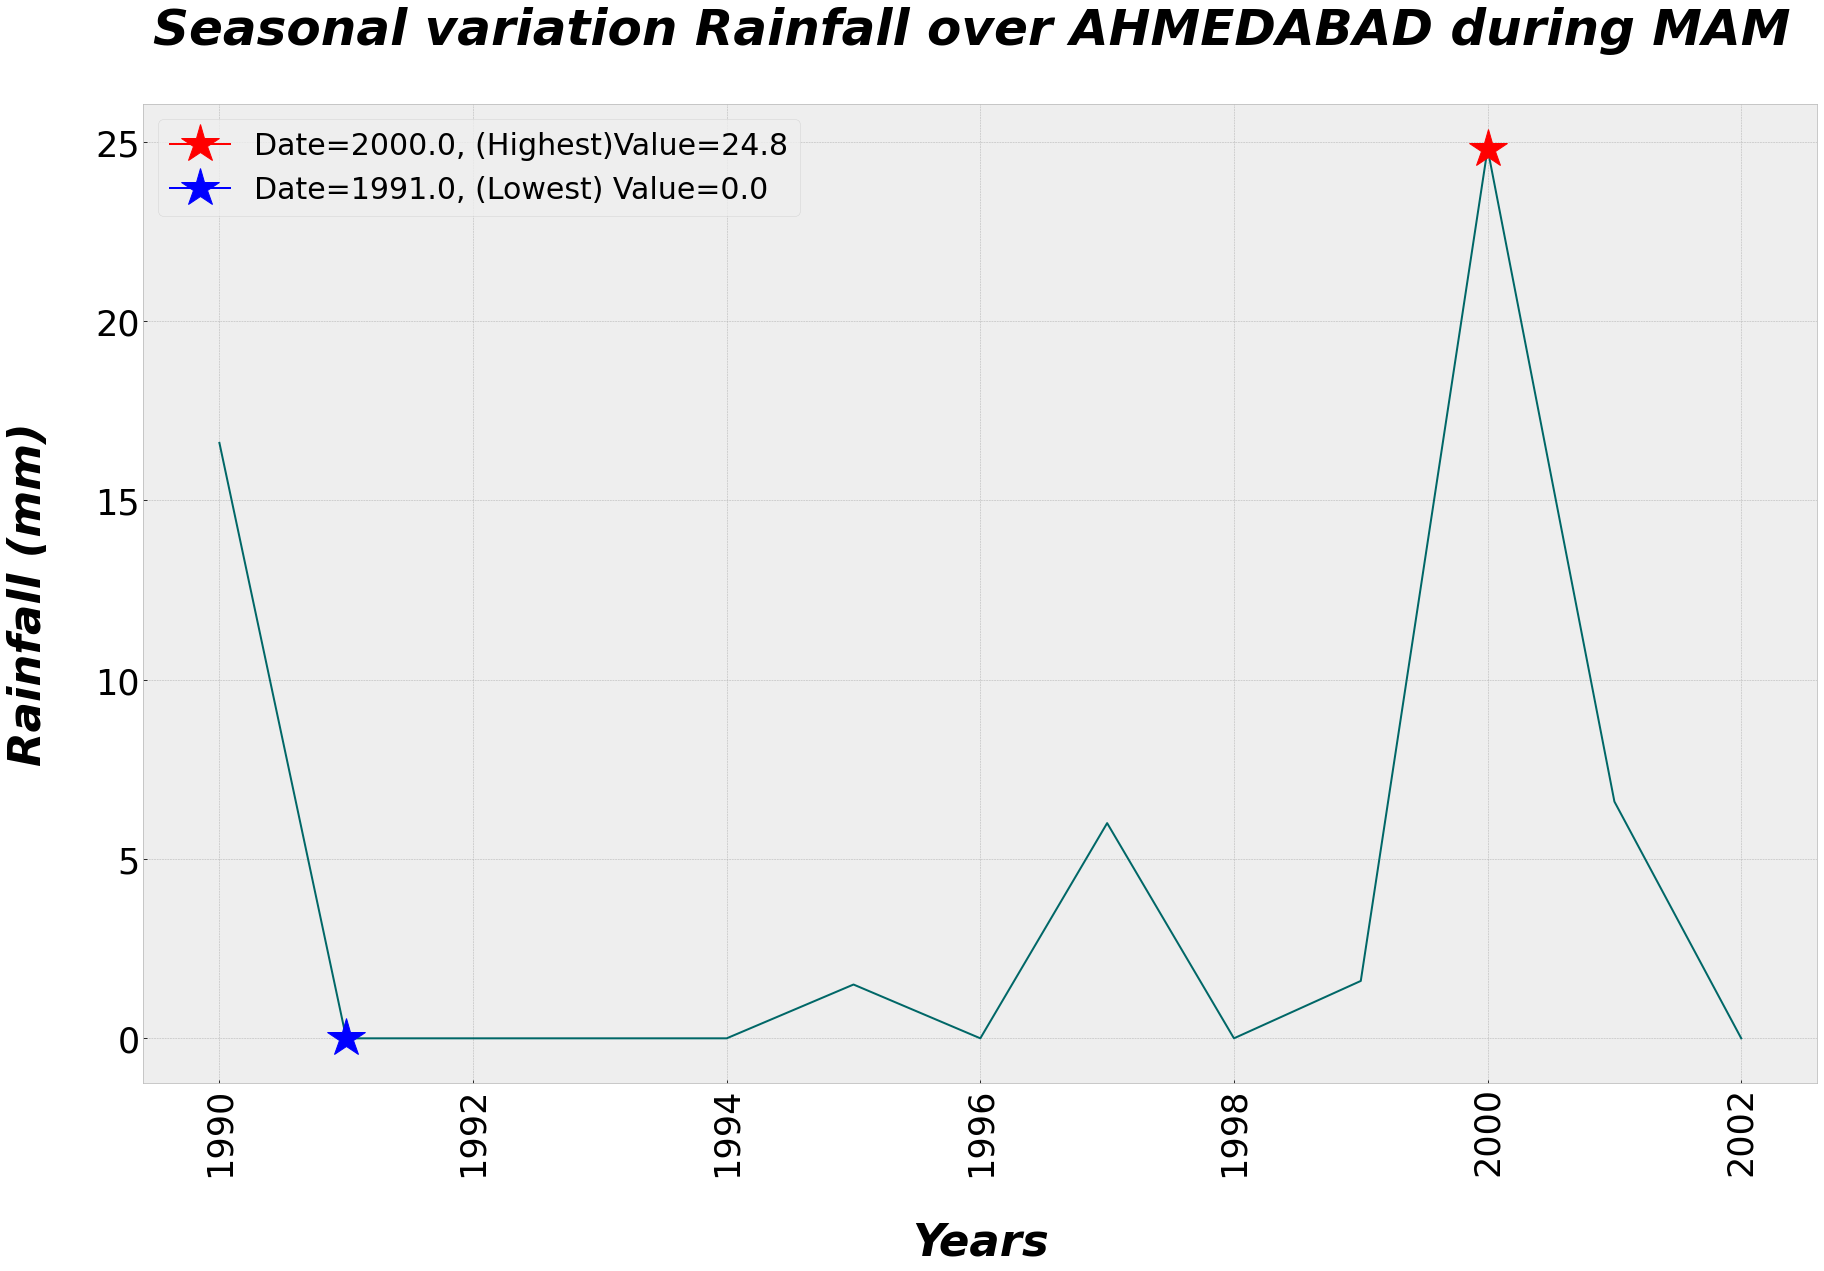

In [313]:
seasonalvar(df_,season)

# This is a line by line trial section

In [262]:
# df                 = df_[(df_.year >= int(startdate)) & (df_.year <=  int(enddate))]
# df
# fig=plt.figure(figsize=[30,18])  
# plt.plot(df['year'], df['total'],marker='o')
# plt.xlabel('Years',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
# plt.xticks(fontsize=35, rotation=90)
# plt.ylabel('total(mm)',fontsize=45,fontstyle='italic',fontweight='bold',labelpad=45,color='black')
# plt.yticks(fontsize=35, rotation=0)
# plt.title('Yearly variation of'+' '+subject_para+' ' + 'over' +' '+subject_loc+' '+ 'during'+' '+startdate+' '+'to'+' '+enddate+' ',fontsize=50,color='black',fontstyle='italic',fontname="sans-serif",fontweight='bold', pad=60)



# y=df['total']
# x=df['year']
# ymax = max(y)
# xpos= x.iloc[list(y).index(ymax)]

# text1= "Date={:}, (Highest)Value={:}".format(xpos, ymax)
# plt.plot(xpos,ymax,color='red',marker='*',ms=40, label=text1)
# plt.legend(prop={"size":30})
